# L'objectif de ce script est d'illustrer graphiquement l'évolution du taux implicite de la TICPE depuis 1993. On étudie ce taux pour le diesel, et pour les carburants sans plombs.

# Import de modules généraux

In [8]:
from pandas import concat

%matplotlib inline

# Import de fonctions et de modules spécifiques à Openfisca

In [9]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar_list
from openfisca_france_indirect_taxation.examples.dataframes_from_legislation.get_accises import get_accises_carburants
from openfisca_france_indirect_taxation.examples.dataframes_from_legislation.get_tva import get_tva_taux_plein
from openfisca_france_indirect_taxation.examples.dataframes_from_legislation.get_prix_carburants import \
    get_prix_carburants


# Appel des paramètres de la législation et des prix

In [10]:
ticpe = ['ticpe_gazole', 'super_95_98']
accise_diesel = get_accises_carburants(ticpe)
prix_ttc = ['diesel_ttc', 'super_95_ttc']
prix_carburants = get_prix_carburants(prix_ttc)
tva_taux_plein = get_tva_taux_plein()


# Création d'une dataframe contenant ces paramètres

In [11]:
df_taux_implicite = concat([accise_diesel, prix_carburants, tva_taux_plein], axis = 1)
df_taux_implicite.rename(columns = {'value': 'taux plein tva'}, inplace = True)


# A partir des paramètres, calcul des taux de taxation implicites

In [12]:
df_taux_implicite['taux_implicite_diesel'] = (
    df_taux_implicite['accise ticpe gazole'] * (1 + df_taux_implicite['taux plein tva']) /
    (df_taux_implicite['prix diesel ttc'] -
    (df_taux_implicite['accise ticpe gazole'] * (1 + df_taux_implicite['taux plein tva'])))
    )

df_taux_implicite['taux_implicite_sp95'] = (
    df_taux_implicite['accise ticpe super9598'] * (1 + df_taux_implicite['taux plein tva']) /
    (df_taux_implicite['prix super 95 ttc'] -
    (df_taux_implicite['accise ticpe super9598'] * (1 + df_taux_implicite['taux plein tva'])))
    )

df_taux_implicite = df_taux_implicite.dropna()


# Réalisation des graphiques

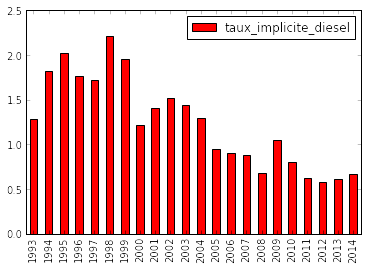

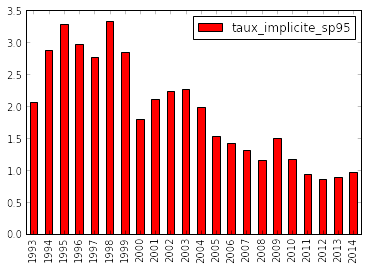

In [13]:
graph_builder_bar_list(df_taux_implicite['taux_implicite_diesel'], 1, 1)
graph_builder_bar_list(df_taux_implicite['taux_implicite_sp95'], 1, 1)